# CNN_UTK_Model for Age detection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

### Data preprocessing

In [2]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [5]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

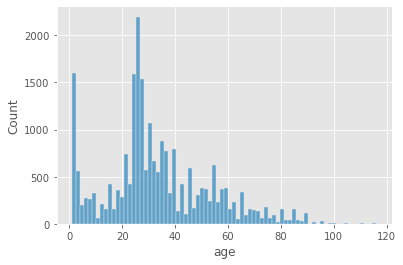

In [7]:
sns.histplot(data=df, x='age')

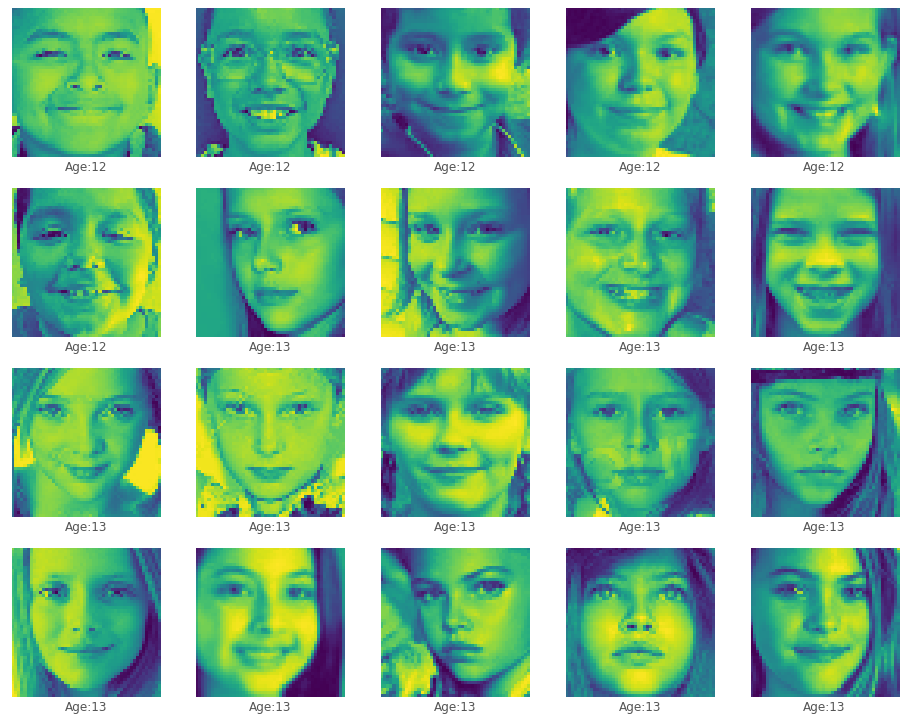

In [8]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [9]:
X = np.array(df['pixels'].tolist())
y = df['age']

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
X = X.reshape(X.shape[0],48,48,1)

In [12]:
X[:5].shape

(5, 48, 48, 1)

In [13]:
y[:5].shape

(5,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Model creation

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [16]:
model = Sequential()

model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(16, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss="mse", optimizer="adam", metrics=["mae", "accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                541760    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 541,985
Trainable params: 541,985
Non-trainable params: 0
_________________________________________________________________


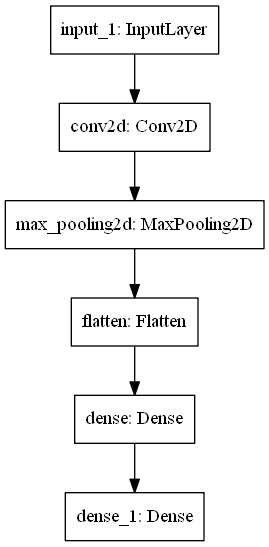

In [17]:
plot_model(model, to_file='models/cnn_utk_model_1.png')

In [18]:
filepath = 'checkpoints/age_utk_model_1_normalized.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [19]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
334/334 [==============================] - ETA: 0s - loss: 456.6205 - mae: 16.2440 - accuracy: 0.0456- ETA: 1s - loss: 475.9326 - mae: 16.6067 - accuracy: 0 - ETA: 1s - loss: 471.1967 - mae: 16.5181 - ac
Epoch 00001: val_loss improved from inf to 272.43643, saving model to checkpoints\age_utk_model_1_normalized.epoch01-loss272.44.hdf5
334/334 [==============================] - 17s 51ms/step - loss: 456.6205 - mae: 16.2440 - accuracy: 0.0456 - val_loss: 272.4364 - val_mae: 12.4820 - val_accuracy: 0.0439
Epoch 2/100
334/334 [==============================] - ETA: 0s - loss: 254.1939 - mae: 12.3890 - accuracy: 0.0478- ETA: 3s - loss: 260
Epoch 00002: val_loss improved from 272.43643 to 219.90030, saving model to checkpoints\age_utk_model_1_normalized.epoch02-loss219.90.hdf5
334/334 [==============================] - 16s 49ms/step - loss: 254.1939 - mae: 12.3890 - accuracy: 0.0478 - val_loss: 219.9003 - val_mae: 11.3553 - val_accuracy: 0.0439
Epoch 3/100
333/334 [==============

Epoch 21/100
331/334 [============================>.] - ETA: 0s - loss: 106.0455 - mae: 7.6215 - accuracy: 0.0435
Epoch 00021: val_loss improved from 124.30517 to 118.86114, saving model to checkpoints\age_utk_model_1_normalized.epoch21-loss118.86.hdf5
334/334 [==============================] - 8s 23ms/step - loss: 105.9444 - mae: 7.6201 - accuracy: 0.0434 - val_loss: 118.8611 - val_mae: 7.8131 - val_accuracy: 0.0388
Epoch 22/100
332/334 [============================>.] - ETA: 0s - loss: 103.1598 - mae: 7.5227 - accuracy: 0.0423
Epoch 00022: val_loss did not improve from 118.86114
334/334 [==============================] - 8s 24ms/step - loss: 103.1503 - mae: 7.5207 - accuracy: 0.0425 - val_loss: 118.9415 - val_mae: 7.7685 - val_accuracy: 0.0401
Epoch 23/100
333/334 [============================>.] - ETA: 0s - loss: 99.6021 - mae: 7.3847 - accuracy: 0.0434
Epoch 00023: val_loss improved from 118.86114 to 113.97899, saving model to checkpoints\age_utk_model_1_normalized.epoch23-loss113.

Epoch 43/100
332/334 [============================>.] - ETA: 0s - loss: 46.4891 - mae: 5.0995 - accuracy: 0.0141
Epoch 00043: val_loss did not improve from 102.76751
334/334 [==============================] - 7s 22ms/step - loss: 46.4982 - mae: 5.1004 - accuracy: 0.0141 - val_loss: 112.7508 - val_mae: 7.7030 - val_accuracy: 0.0186
Epoch 44/100
332/334 [============================>.] - ETA: 0s - loss: 44.3297 - mae: 4.9880 - accuracy: 0.0128
Epoch 00044: val_loss did not improve from 102.76751
334/334 [==============================] - 7s 22ms/step - loss: 44.2856 - mae: 4.9865 - accuracy: 0.0128 - val_loss: 110.7307 - val_mae: 7.7245 - val_accuracy: 0.0164
Epoch 45/100
334/334 [==============================] - ETA: 0s - loss: 42.5179 - mae: 4.8746 - accuracy: 0.0126
Epoch 00045: val_loss did not improve from 102.76751
334/334 [==============================] - 7s 22ms/step - loss: 42.5179 - mae: 4.8746 - accuracy: 0.0126 - val_loss: 107.3192 - val_mae: 7.4437 - val_accuracy: 0.0143
E

Epoch 68/100
333/334 [============================>.] - ETA: 0s - loss: 17.9510 - mae: 3.1755 - accuracy: 0.0071- ETA: 6s 
Epoch 00068: val_loss did not improve from 102.76751
334/334 [==============================] - 8s 23ms/step - loss: 17.9519 - mae: 3.1758 - accuracy: 0.0071 - val_loss: 114.8229 - val_mae: 7.7049 - val_accuracy: 0.0127
Epoch 69/100
332/334 [============================>.] - ETA: 0s - loss: 17.1523 - mae: 3.0978 - accuracy: 0.0068- ETA: 2s - loss: 16
Epoch 00069: val_loss did not improve from 102.76751
334/334 [==============================] - 8s 23ms/step - loss: 17.1353 - mae: 3.0970 - accuracy: 0.0068 - val_loss: 117.1809 - val_mae: 7.7891 - val_accuracy: 0.0135
Epoch 70/100
333/334 [============================>.] - ETA: 0s - loss: 16.8305 - mae: 3.0799 - accuracy: 0.0070
Epoch 00070: val_loss did not improve from 102.76751
334/334 [==============================] - 8s 23ms/step - loss: 16.8389 - mae: 3.0803 - accuracy: 0.0070 - val_loss: 116.8301 - val_mae: 7

333/334 [============================>.] - ETA: 0s - loss: 8.1297 - mae: 2.1137 - accuracy: 0.0058
Epoch 00092: val_loss did not improve from 102.76751
334/334 [==============================] - 8s 23ms/step - loss: 8.1423 - mae: 2.1147 - accuracy: 0.0058 - val_loss: 128.4459 - val_mae: 8.1873 - val_accuracy: 0.0127
Epoch 93/100
332/334 [============================>.] - ETA: 0s - loss: 8.1864 - mae: 2.1385 - accuracy: 0.0063
Epoch 00093: val_loss did not improve from 102.76751
334/334 [==============================] - 8s 23ms/step - loss: 8.1981 - mae: 2.1406 - accuracy: 0.0063 - val_loss: 128.7851 - val_mae: 8.1446 - val_accuracy: 0.0118
Epoch 94/100
332/334 [============================>.] - ETA: 0s - loss: 8.1407 - mae: 2.1379 - accuracy: 0.0065
Epoch 00094: val_loss did not improve from 102.76751
334/334 [==============================] - 8s 23ms/step - loss: 8.1394 - mae: 2.1380 - accuracy: 0.0065 - val_loss: 131.2064 - val_mae: 8.2628 - val_accuracy: 0.0105
Epoch 95/100
332/334

<AxesSubplot:>

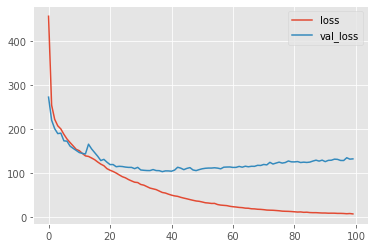

In [20]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [21]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

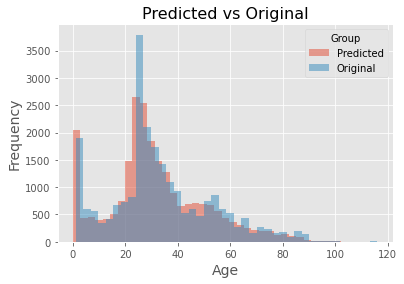

In [22]:
pd.Series(y_pred.reshape((len(y_pred)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

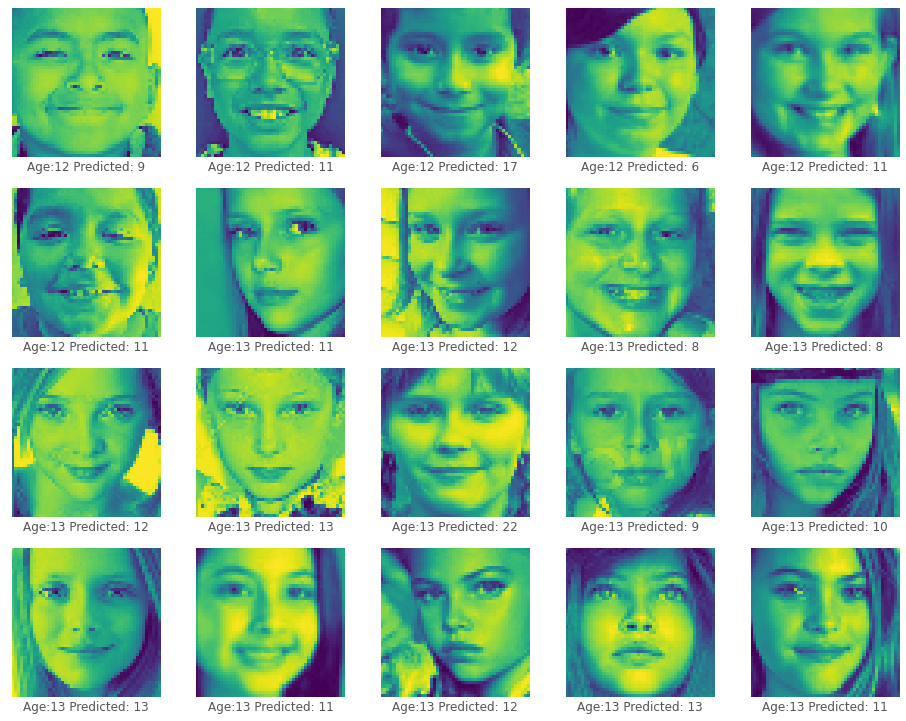

In [27]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(round(y_pred[i][0])))
plt.show()

### Predictions for best model

In [29]:
import os
path = os.getcwd() + r'\checkpoints\age_utk_model_1_normalized.epoch38-loss102.77.hdf5'

In [30]:
best_model = tf.keras.models.load_model(path)

In [31]:
y_pred_best = best_model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

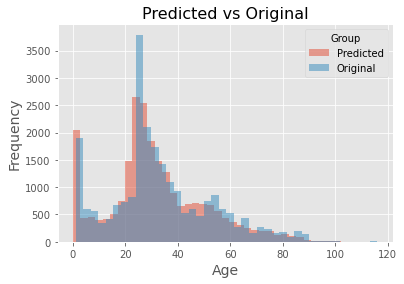

In [32]:
pd.Series(y_pred.reshape((len(y_pred_best)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

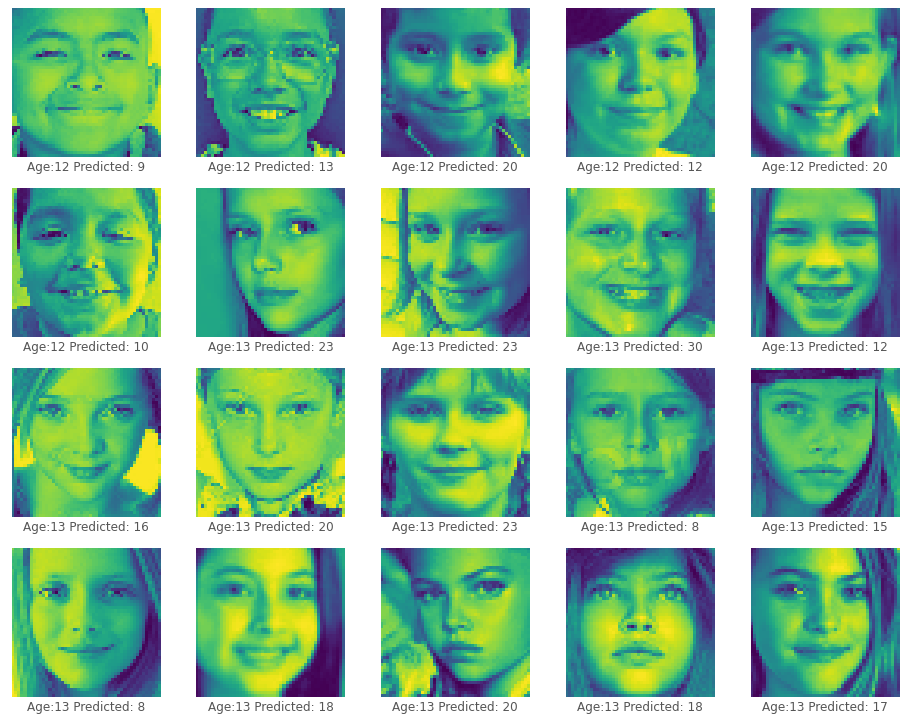

In [33]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(round(y_pred_best[i][0])))
plt.show()